In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [497]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

#SEAN'S
# import numpy as np
# df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
# df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
# df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
# df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

# #show all columns
# pd.set_option('display.max_columns', 100)

import numpy as np
df.loc[:,'log_views'] = np.log10(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log10(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log10(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log10(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [491]:
'''DATAFRAME LIST
df: (csv file) shows details of trending youtube videos on the last day they were captured trending

df_all_timestamps: (csv file) shows details of trending youtube videos every time they were captured trending

US_trending: focuses on the trending videos from the United States

US_channel_counts: shows the amount of trending videos by every channel

US_sorted_counts: sorts US_channel_counts from highest count to lowest

US_top_10: uses US_sorted_counts to find all channels with more than 35 trending videos

avg_view_count: shows the average of views each channel has on their trending videos
testing_view_count: shows the sum of views each channel has on their trending videos

channel_and_view_counts: a merge of US_channel_counts and testing_view_count, that shows a channel, the amount of
videos they have trending, and the amount of views they have in total

test_counts: made to show the counts of channels with more than one trending video and those with only one

top_channels_all: shows all the columns from the df dataframe but only for the top 10 US channels
'''



In [559]:
US_bool = df.country == 'US'

US_trending= df.loc[US_bool]

US_trending.head()
# US_trending.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
310,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,Tati,26,Howto & Style,2017-11-08,18:00:05,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",1277364,56867,2148,25326,https://i.ytimg.com/vi/o78x918zbFk/default.jpg,False,False,False,This was the most UNEXPECTED WTF I've done so ...,US,6.106315,4.754868,3.332236,4.403584
311,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,22,People & Blogs,2017-11-08,22:13:18,"madelaine|""madelainepetsch""|""madelaine petsch""...",280065,20289,38,939,https://i.ytimg.com/vi/6ixU_vdE0Es/default.jpg,False,False,False,I asked Travis to replicate my everyday makeup...,US,5.447260,4.307282,1.591065,2.973128
312,wRGldR_SQAA,2017-11-14,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09,18:01:04,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,US,3.354108,0.000000,0.000000,0.000000
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US,5.672275,3.606166,2.634477,3.191451
314,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,Sports,2017-11-09,07:27:32,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,US,4.212347,2.170262,1.146128,1.681241


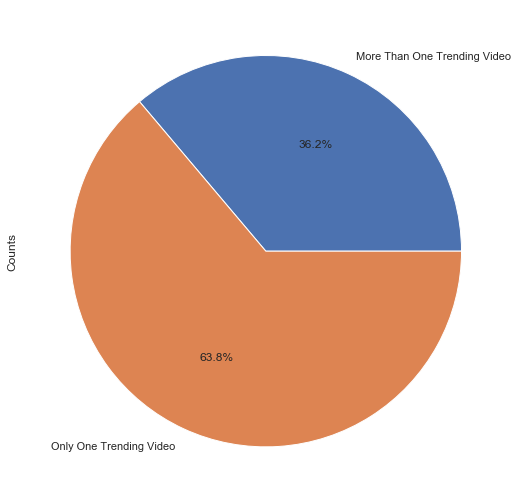

In [579]:
# Channels with only one trending video
# len(US_sorted_counts.loc[US_sorted_counts['counts'] == 1]) #1211

# Channels with moore than one trending video
# len(US_sorted_counts.loc[US_sorted_counts['counts'] > 1]) #686
.
test_counts = pd.DataFrame({'Counts':[len(US_sorted_counts.loc[US_sorted_counts['counts'] > 1]), 
                                      len(US_sorted_counts.loc[US_sorted_counts['counts'] == 1])]},
                          index=['More Than One Trending Video', 'Only One Trending Video'])

test_counts.plot.pie(y="Counts", figsize=(9, 9), autopct='%1.1f%%').get_legend().remove()

In [563]:
# Counts of trending videos per US channel_title
US_channel_counts = US_trending.groupby(['channel_title']).size().reset_index(name='counts')

# US channels sorted from highest amount of trending videos to lowest
US_sorted_counts = US_channel_counts.sort_values(by=['counts'], ascending=False)

US_channel_counts

,channel_title,counts
0,12 News,1
1,1MILLION Dance Studio,4
2,1theK (원더케이),2
3,20th Century Fox,12
4,2CELLOS,1
...,...,...
1892,ТСН,1
1893,圧倒的不審者の極み!,1
1894,杰威爾音樂 JVR Music,1
1895,郭韋辰,1


In [586]:
# Adding together the amount of views per channel
# testing_view_count = US_trending.groupby(['channel_title'])['views'].agg('sum').reset_index(name='view_counts')
# testing_view_count

#Average amount of views per channel
avg_view_count = US_trending.groupby(['channel_title'])['log_views'].agg('mean').reset_index(name='view_counts')
avg_view_count

,channel_title,view_counts
0,12 News,4.965333
1,1MILLION Dance Studio,5.886668
2,1theK (원더케이),6.514586
3,20th Century Fox,6.289116
4,2CELLOS,5.354719
...,...,...
1892,ТСН,5.256987
1893,圧倒的不審者の極み!,6.131333
1894,杰威爾音樂 JVR Music,7.341586
1895,郭韋辰,4.157487


In [587]:
# Making my channel view dataframe and my channel count dataframe into one dataframe
channel_and_view_counts = pd.merge(US_channel_counts, avg_view_count, on='channel_title', how='inner')
channel_and_view_counts

,channel_title,counts,view_counts
0,12 News,1,4.965333
1,1MILLION Dance Studio,4,5.886668
2,1theK (원더케이),2,6.514586
3,20th Century Fox,12,6.289116
4,2CELLOS,1,5.354719
...,...,...,...
1892,ТСН,1,5.256987
1893,圧倒的不審者の極み!,1,6.131333
1894,杰威爾音樂 JVR Music,1,7.341586
1895,郭韋辰,1,4.157487


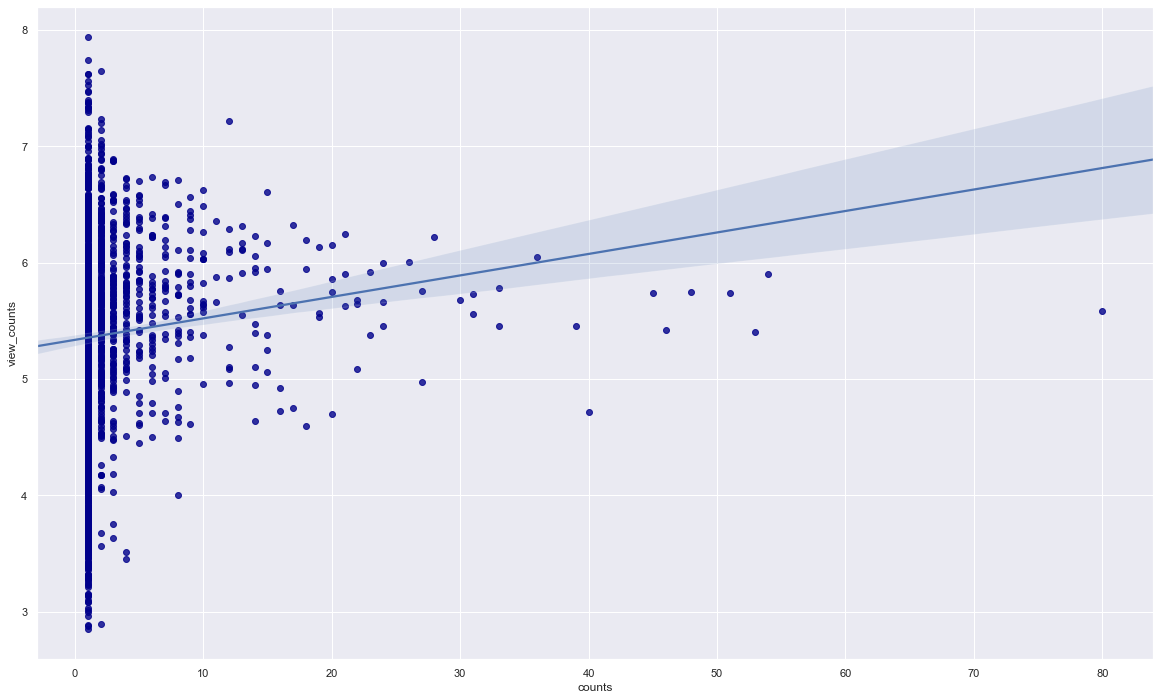

In [588]:
# shows a plot of amount of trending video each channel has by the total view count of their videos
# sns.set(rc={'figure.figsize':(18,10)})
# channel_and_view_counts.plot.scatter(x='counts', y='view_counts', c='DarkBlue')


sns.regplot(x = 'counts', y = 'view_counts', 
           data = channel_and_view_counts, scatter_kws={"color":"darkblue"})  

# sns.lmplot(x = 'counts', y = 'view_counts', 
#            data = channel_and_view_counts, 
#            hue = "counts", scatter_kws={"color":"darkblue"}, 
#            fit_reg = False, legend = False)  

In [568]:
top_channels_all = US_trending.query('channel_title == "ESPN" or channel_title == "TheEllenShow" or channel_title == "NBA" or channel_title == "The Late Show with Stephen Colbert" or channel_title == "Jimmy Kimmel Live" or channel_title == "CNN" or channel_title == "The Tonight Show Starring Jimmy Fallon" or channel_title == "Refinery29" or channel_title == "Netflix" or channel_title == "BuzzFeedVideo"')
top_channels_all

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count
313,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,Sports,2017-11-08,15:59:06,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,US,5.672275,3.606166,2.634477,3.191451
675,zy0b9e40tK8,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09,09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,US,5.578354,3.751510,2.167317,2.829947
698,yuBqWcSKrCk,2017-11-14,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,24,Entertainment,2017-11-10,14:00:10,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,275,https://i.ytimg.com/vi/yuBqWcSKrCk/default.jpg,False,False,False,"Movie star Owen Wilson was back on the show, a...",US,5.484196,3.519303,2.117271,2.440909
701,k29YnfttqEU,2017-11-14,Mean Tweets – Country Music Edition #3,Jimmy Kimmel Live,23,Comedy,2017-11-09,04:58:04,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1315873,9312,584,769,https://i.ytimg.com/vi/k29YnfttqEU/default.jpg,False,False,False,"From time to time, we like to shine a light on...",US,6.119214,3.969090,2.767156,2.886491
1783,Rq9-mW6HgQE,2017-11-15,Sean Astin Knew Nothing About 'Lord Of The Rin...,The Late Show with Stephen Colbert,24,Entertainment,2017-11-09,08:35:00,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",908489,12261,339,1600,https://i.ytimg.com/vi/Rq9-mW6HgQE/default.jpg,False,False,False,'Stranger Things' star Sean Astin thought he w...,US,5.958320,4.088561,2.531479,3.204391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169753,VlZ1SWLBfPE,2018-06-14,The Truth About Where Hair Extensions Come Fro...,Refinery29,26,Howto & Style,2018-06-09,15:01:13,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",2756607,139611,1415,7439,https://i.ytimg.com/vi/VlZ1SWLBfPE/default.jpg,False,False,False,"This week on Shady, our host, Lexy Lebsack, ta...",US,6.440375,5.144923,3.151063,3.871573
169760,yz7Xq3T0YPs,2018-06-14,"Katherine Langford on 13 Reasons Why, Australi...",Jimmy Kimmel Live,24,Entertainment,2018-06-13,09:00:06,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",296295,8157,294,764,https://i.ytimg.com/vi/yz7Xq3T0YPs/default.jpg,False,False,False,"Katherine talks about learning accents, growin...",US,5.471726,3.911584,2.469822,2.883661
169818,amtC28yfYCM,2018-06-14,Mindy Kaling Is Mad She Wasn't Invited to the ...,The Tonight Show Starring Jimmy Fallon,23,Comedy,2018-05-24,08:00:00,"The Tonight Show|""Jimmy Fallon""|""Mindy Kaling""...",588133,6583,381,486,https://i.ytimg.com/vi/amtC28yfYCM/default.jpg,False,False,False,Mindy Kaling chats with Jimmy about his though...,US,5.769476,3.818490,2.582063,2.687529
169834,5y0owYFTMno,2018-06-14,Ethan Hawke Knows To Seek Knowledge From Masters,The Late Show with Stephen Colbert,24,Entertainment,2018-06-05,07:53:32,"The Late Show|""Late Show""|""Stephen Colbert""|""S...",360432,3899,231,436,https://i.ytimg.com/vi/5y0owYFTMno/default.jpg,False,False,False,'First Reformed' star Ethan Hawke knows to sta...,US,5.556825,3.591065,2.365488,2.640481


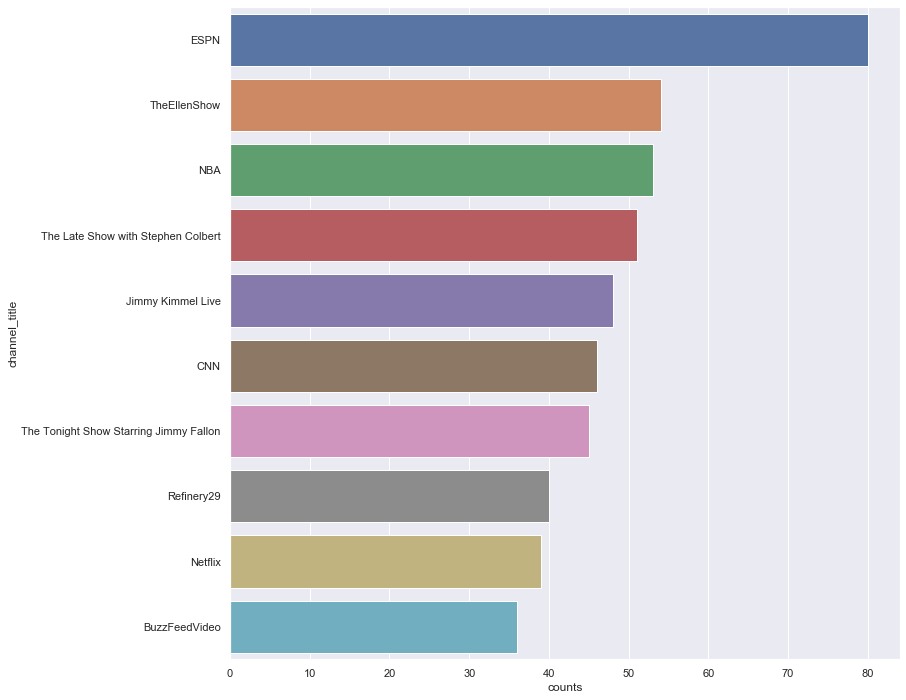

In [529]:
# US channels with more than 35 trending videos, 10 channels total
US_top_10 = US_sorted_counts.loc[US_sorted_counts['counts'] > 35]


sns.set(rc={'figure.figsize':(12,12)})
sns.barplot(x="counts", y="channel_title", data=US_top_10)

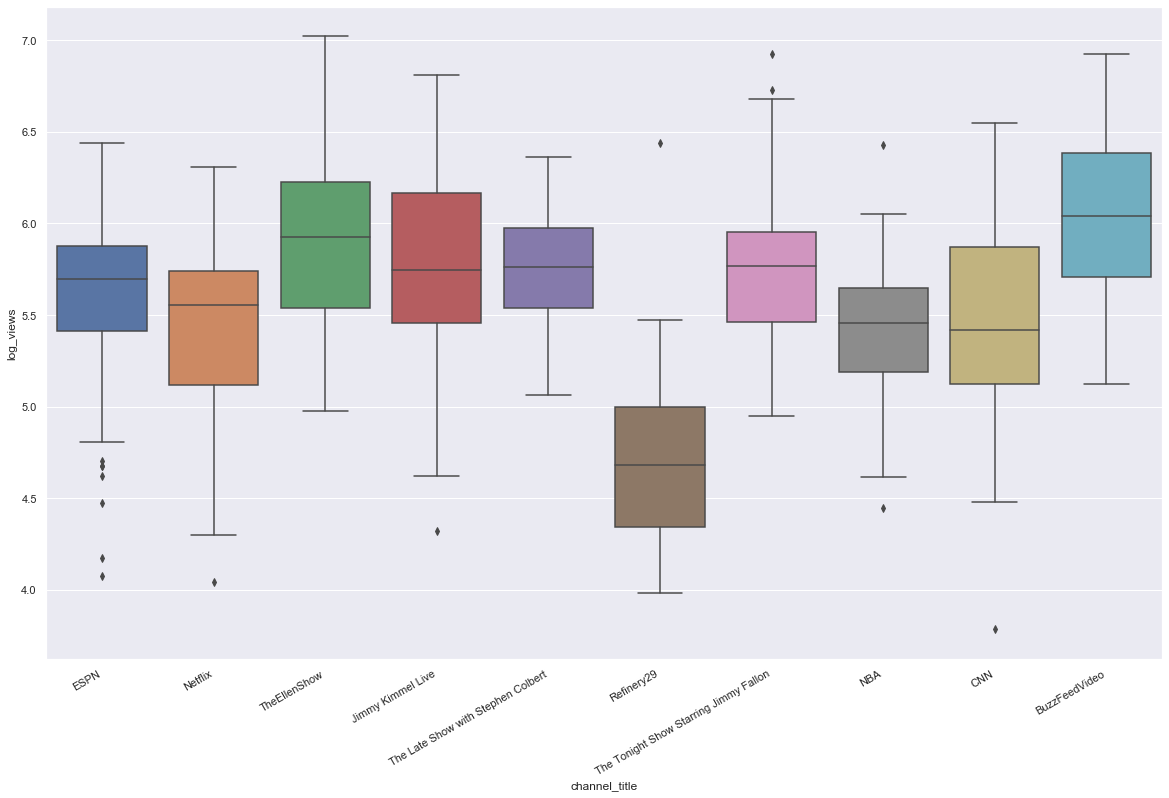

In [589]:
# plt.ylim(0,1000000)
# sns.set(rc={'figure.figsize':(23,12)})
# sns.boxplot(x="channel_title", y="views", data=top_channels_all)

sns.set(rc={'figure.figsize':(20,12)})
n = sns.boxplot(x="channel_title", y="log_views", data=top_channels_all)
n_axis = n.set_xticklabels(n.get_xticklabels(), rotation=30, horizontalalignment='right')

#  MAYBE?
# stuff that works, but you aren't sure if you want
# goes underneath here

In [ ]:
carat = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
price = [100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600]
color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G',]

df = pd.DataFrame(dict(carat=carat, price=price, color=color))

sns.lmplot('carat', 'price', data=df, hue='color', fit_reg=False)

plt.show()

In [405]:
# US_bool = df.country == 'US'

# US_trending= df.loc[US_bool]
# US_trending.head()

# FROM SEAN
channel_list = US_top_10.channel_title.to_list()
channel_list

# channel_list = list(US_top_10.channel_title)
# channel_list


# top_channels_all = US_trending.isin(channel_list)
# top_channels_all

# top_channels_all = US_trending.loc[channel_list,:]
# top_channels_all

['ESPN',
 'TheEllenShow',
 'NBA',
 'The Late Show with Stephen Colbert',
 'Jimmy Kimmel Live',
 'CNN',
 'The Tonight Show Starring Jimmy Fallon',
 'Refinery29',
 'Netflix',
 'BuzzFeedVideo']

In [8]:
# print(US_trending.groupby(['channel_title']).groups['12 News'])
print(len(US_trending.groupby(['channel_title']).groups['1MILLION Dance Studio']))

4


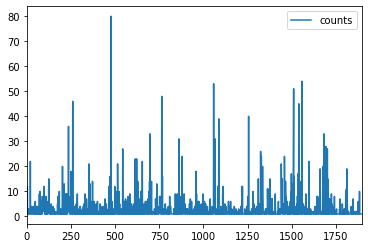

In [9]:
US_channel_counts.plot()